# Decision Tree's

The title of the dataset is ‘Crime and Communities’. It is prepared using real data from socio-economic data from 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. This dataset contains a total number of 147 attributes and 2216 instances.

This code aims to predict the number of violent crimes per 100K persons in a community from a number of predictive variables.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Read data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python',na_values=["?"]) # Ensure that unknown values are set to NA

data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print('There is {} observations with {} features'.format(data.shape[0], data.shape[1]))

There is 2214 observations with 147 features


Preliminary Data Cleaning

In [3]:
# Delete rows with NA values in target function
df = data[data['ViolentCrimesPerPop'].notna()]

array([[<AxesSubplot:title={'center':'ViolentCrimesPerPop'}>]],
      dtype=object)

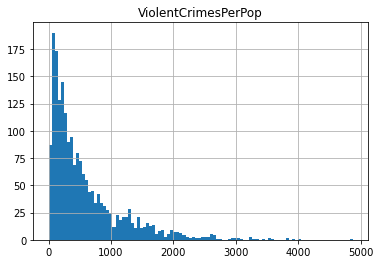

In [4]:
# Visualise target function
df.hist(column='ViolentCrimesPerPop', bins = 100)

In [5]:
# Describe data
df.describe()

,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,819.000000,816.000000,1993.000000,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1990.000000,1990.000000,1991.000000,1991.000000,1990.000000,1990.000000,1906.000000,1906.000000,1993.000000,1901.000000
mean,58.851038,46238.420343,5.513798,5.227164e+04,2.706613,9.513778,83.485058,2.748906,8.484922,14.432198,...,756.141709,1054.678281,2117.818182,3379.939764,503.938693,478.889377,30.534627,32.121175,589.353914,4944.190084
std,126.495909,25274.684404,2.881867,2.021962e+05,0.343129,14.104338,16.396668,4.648607,15.211885,4.479479,...,3014.315314,773.527258,7355.069727,1941.247371,3196.484928,503.737545,180.663391,39.623065,614.816135,2786.155494
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,9.000000,25100.250000,3.000000,1.436300e+04,2.490000,0.940000,75.880000,0.610000,0.920000,12.230000,...,97.000000,520.897500,387.000000,2013.320000,30.000000,159.322500,1.000000,7.252500,161.730000,2913.400000
50%,23.000000,48167.000000,5.000000,2.268600e+04,2.650000,3.160000,89.600000,1.240000,2.350000,13.620000,...,209.500000,854.965000,745.000000,3077.530000,75.500000,308.320000,5.000000,21.045000,374.070000,4480.210000
75%,60.000000,66670.000000,8.000000,4.318400e+04,2.850000,11.970000,95.990000,2.730000,8.610000,15.390000,...,532.250000,1375.360000,1688.500000,4365.115000,238.000000,600.282500,16.000000,43.280000,794.410000,6273.780000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [6]:
# Delete columns with NA values
pd.set_option("display.max_rows", None, "display.max_columns", None)
# df.isnull().sum()
pd.set_option("display.max_rows", 200, "display.max_columns", 20)

columns_to_drop = ['communityCode', 'countyCode', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
                   'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite',
                  'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                  'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'arsons', 'arsonsPerPop',
                  'nonViolPerPop', 'PctPolicMinor']

df = df.drop(columns_to_drop, axis=1)

# df.isnull().sum()
df = df[df['autoTheftPerPop'].notna()]
df = df[df['autoTheft'].notna()]
df = df[df['larcPerPop'].notna()]
df = df[df['larcenies'].notna()]
df = df[df['burglPerPop'].notna()]
df = df[df['burglaries'].notna()]
df = df[df['OtherPerCap'].notna()]
# df.isnull().sum()

In [7]:
# Identify number of attributes and instances
print('There is {} observations with {} features'.format(df.shape[0], df.shape[1]))

There is 1986 observations with 120 features


Decision Tree Data Cleaning

In [8]:
# Get rid of non-predictive columns
non_pred = ['communityname', 'state', 'fold']
df = df.drop(non_pred, axis=1)

# Get rid of all predictive columns except ViolentCrimesPerPop
pred = ['murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
        'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop']
df = df.drop(pred, axis=1)

print('There is {} observations with {} features'.format(df.shape[0], df.shape[1]))
df.head()

There is 1986 observations with 103 features


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,127.56
1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,218.59
2,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,306.64
4,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,442.95
5,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,9.19,77.30,63.45,82.23,93.53,10.9,2643.5,9.62,0.0,226.63


Exploratory Data Analysis

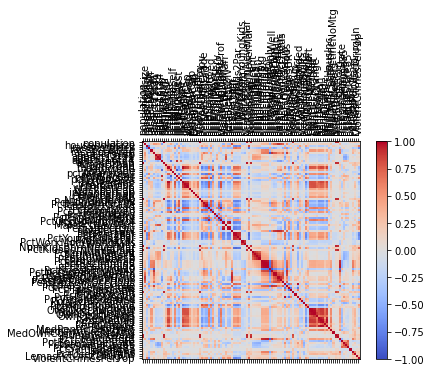

In [9]:
# Explore continuous variable correlations
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [10]:
# Extract features that are most correlated
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

corr = get_top_abs_correlations(df, 10)
print("Top Absolute Correlations")
print(corr)

Top Absolute Correlations
population       numbUrban            0.998998
PctRecImmig8     PctRecImmig10        0.995203
PctRecImmig5     PctRecImmig8         0.993743
OwnOccLowQuart   OwnOccMedVal         0.991515
PctRecentImmig   PctRecImmig5         0.989843
population       NumUnderPov          0.988476
RentMedian       MedRent              0.988094
numbUrban        NumUnderPov          0.986470
PctLargHouseFam  PctLargHouseOccup    0.986210
PctFam2Par       PctKids2Par          0.985713
dtype: float64


In [11]:
# Identify features most correlated with target feature
def get_top_tar(target, df):
    tar = df[target]
    corr = []
    for column in df:
        p, s = pearsonr(tar, df[column])
        corr.append([column, p])
    return corr

cor = get_top_tar('ViolentCrimesPerPop', df)
trans = []
for i in cor:
    if i[1] > 0.5:
        trans.append(i[0])
    else:
        continue
print(trans)

['racepctblack', 'pctWPubAsst', 'PctPopUnderPov', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctKidsBornNeverMar', 'ViolentCrimesPerPop']


* Higly correlated features (population, numbUrban, PctImmig8, Rent, Occupancy, etc.) may describe the violent crimes per 100k people from different social-economic angles. Their variance might support model capacity for generalization.
* 'racepctblack', 'pctWPubAsst', 'PctPopUnderPov', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctKidsBornNeverMar', 'ViolentCrimesPerPop' are most correlated with target feature. So we should transform them to reduce the influence.

Decision Tree

In [12]:
# Formulate hypotheses & transform the data
# (Still not sure how to approach this)

In [13]:
# Set suitable threshold for continuous target feature (Violent Crimes per 100k people)
def high_crime(row):
    if row['ViolentCrimesPerPop'] > 3000:
        return 1
    elif row['ViolentCrimesPerPop'] < 3000:
        return 0

df['HighCrime'] = df.apply(high_crime, axis = 1)

In [14]:
# Split data on train and test
# Sort Dataframe
y = df.HighCrime
df.drop('HighCrime', axis=1, inplace=True)
# set global random state
random_state = 1
# Divide the data into train and test split (70% training data and 30% of testing data)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=random_state)


In [15]:
# Train the model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Make prediction
y_pred = clf.predict(X_test)

In [16]:
# Get Accuracy score
result = confusion_matrix(y_test, y_pred)
result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report:",)
print (result1)
print("Accuracy:", result2)

Confusion Matrix:
[[593   0]
 [  0   3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00         3

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596

Accuracy: 1.0


Considering that all the accuracy scores are equal to 1, there is something wrong with how the model was fitted.